# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 2 </center>

## <center>Grupo 21</center>

#### Integrantes: Francisco Juárez, Lucas Aldazabal, Valentin Schneider, Gonzalo Rizzo Ehrenbock

# <center> Procesamiento del Lenguaje Natural <center/> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")

In [2]:
#Import dataframe
ds_propiedades = pd.read_csv('./ds_propiedades_total_clasificado.csv')
ds_descripciones = pd.read_csv('./properati_argentina_2021_decrip.csv')
ds_propiedades.head()

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,F5IvmD1uzzdIR7b96ozt4g==,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,Venta: Hermoso piso de categoría en excelente ...,2875.000000,alto
1,IiT/P7WfYDcqbhu7tf5V4Q==,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,Departamento - Colegiales,2960.000000,alto
2,6XXcElx/4OwCcH4NI06Oiw==,-34.605825,-58.422214,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,Departamento en venta tres ambientes- Almagro,1893.617021,medio
3,8R7hSzqWFk9rX4wBXxfORA==,-34.561971,-58.455670,Belgrano,Departamento,2.0,1.0,52.0,48.0,127000.0,Departamento - Belgrano,2442.307692,medio
4,UAKYqQx9s0MfIdLzrJv8Ig==,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,Lindísimo departamento antiguo en excelente es...,1709.210526,bajo


In [3]:
#filter ds_descripciones by id in ds_propiedades
ds_descripciones = ds_descripciones[ds_descripciones['id'].isin(ds_propiedades['id'])]
ds_descripciones.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,gn55JPmcjftBV/at1a7fPg==,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
10,+9uGr8tPEUkKnpjOef+gUw==,SE VENDE EXCELENTE PH de 2 CÓMODOS AMBIENTES M...
11,uH5H+RfQM87Qtrb13+T4hA==,"Venta PH 4 ambientes Paternal<br><br>Cálido, ..."


## Exportamos el dataframe a un archivo de texto para poder pasarlo por ECmes

In [4]:
ds_descripciones_sin_id = ds_descripciones.drop(['id'], axis=1)

ds_descripciones_sin_id.to_csv('ds_descripciones.txt', index=False)

## Limpiamos el archivo de descripciones para que lo pueda leer Ecmes correctamente.

In [5]:
dic_replace = {
    '(': ',',
    ')': ',',
    '<br>': ' ',
    '<br/>': ' ',
    '/': ' ',
    '°': ' ',
    'º': ' ',
    ';': ' ',
    '•': ' ',
    ':': ' ',
    '#': ' ',
    '•': ' ',
    '-': ' ',
    '_': ' ',
    '"': ' ',
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U',
    'ñ': 'ni',
    'Ñ': 'NI',
    '!': ' ',
    'm²': 'm2',
    'M²': 'M2',
    '&': 'y',
}

In [6]:
#for every line in ds_descripciones.txt replace the '(' and ')' with ',' and save it in ds_descripciones.txt line by line 
with open('ds_descripciones.txt', 'r', encoding = 'utf8') as f_in, open('ds_descripciones_out.txt', 'w', encoding = 'utf8') as f_out:
    for line in f_in:
        for src, target in dic_replace.items():
            line = line.replace(src, target)
        f_out.writelines(line)


    



##### por ahora no usamos esto, pero capaz lo necesitamos en algun momento

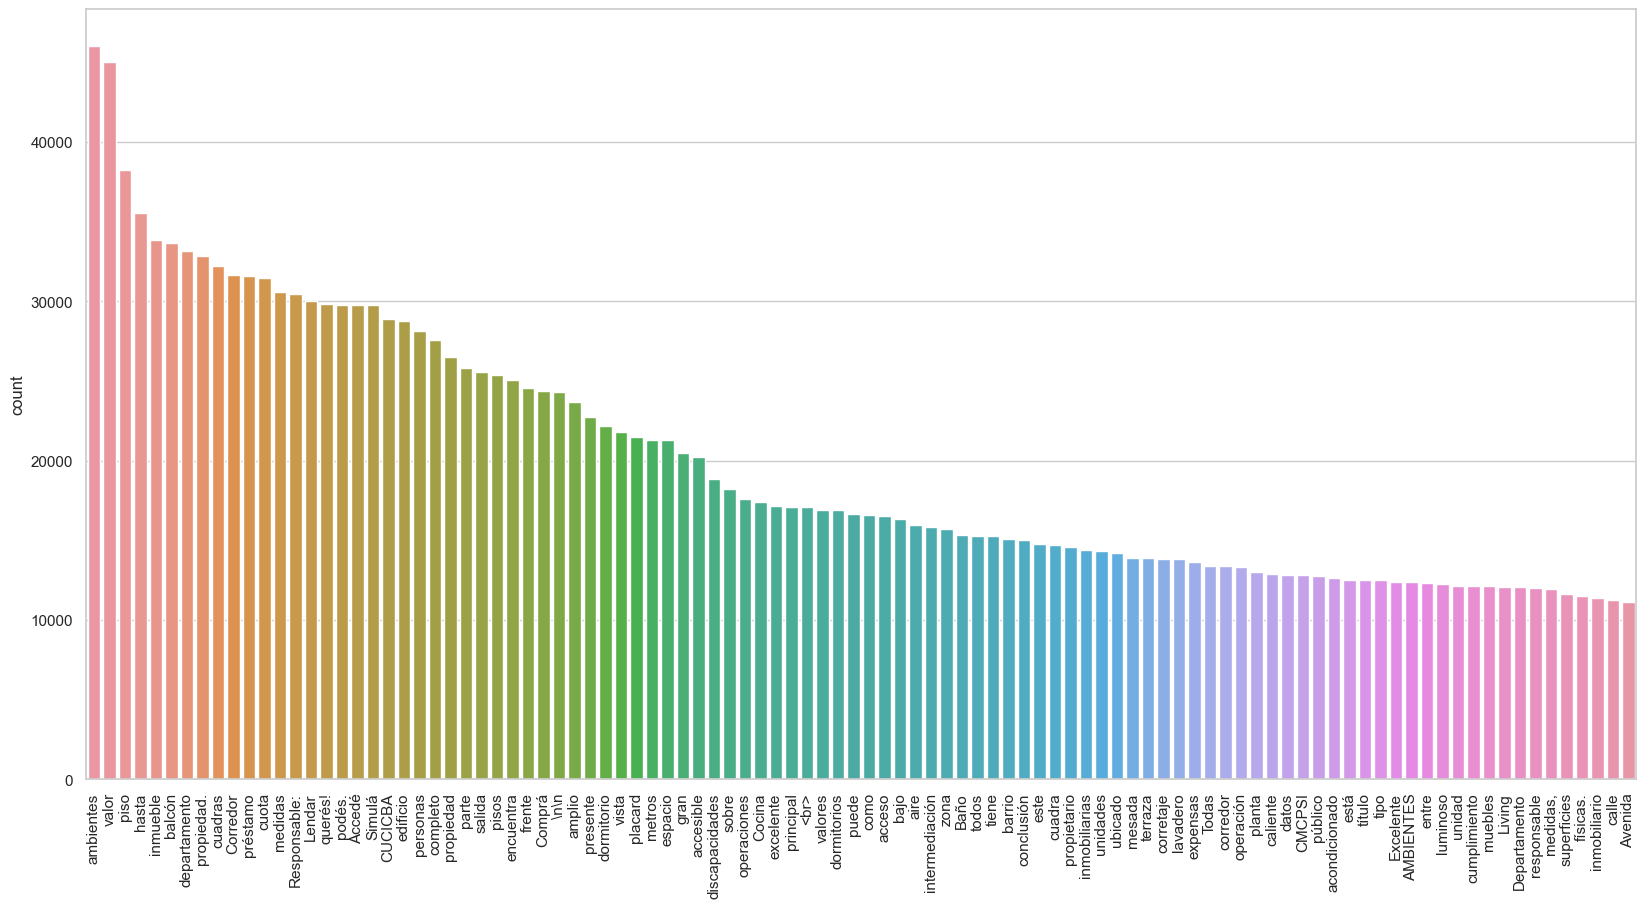

In [7]:
# count how many times every word appears in ds_descripciones['property_description']
# and save it in a dictionary


word_count = {}
palabras_ignoradas = ['para', 'baño', 'cocina', 'comedor','casa','cuenta','esta','living']
ds_descripciones.reset_index(drop=True, inplace=True)

for i in range(len(ds_descripciones['property_description'])):
    if type(ds_descripciones['property_description'][i]) == str:
        for word in ds_descripciones['property_description'][i].split():
            if len(word) < 4 or word in palabras_ignoradas:
                continue
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

# save dictionary in a dataframe

word_count_aux = word_count.copy()

for key, value in word_count_aux.items():
    if value <= 300:
        del word_count[key]

df_word_count = pd.DataFrame.from_dict(word_count, orient='index', columns=['count'])
df_word_count.sort_values(by=['count'], ascending=False, inplace=True)
df_word_count



# barplot of the 20 most common words
plt.figure(figsize=(20,10))
sns.barplot(x=df_word_count.index[:100], y=df_word_count['count'][:100])
plt.xticks(rotation=90)
plt.show()


In [8]:
##split train y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds_descripciones_sin_id, ds_propiedades['tipo_precio'], test_size=0.20, random_state=1)

## 1b) Entranamiento XGBoost
### Hiperparametros TP1

In [9]:
import xgboost as xgb

#Creo un modelo de XGBoost para reductir el error cuadraditico medio
xgb.XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [10]:
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror',
 base_score= None,
 booster= None,
 callbacks= None,
 colsample_bylevel= None,
 colsample_bynode= None,
 colsample_bytree= None,
 early_stopping_rounds= None,
 enable_categorical= False,
 eval_metric= None,
 feature_types= None,
 gamma= None,
 gpu_id= None,
 grow_policy= None,
 importance_type= None,
 interaction_constraints= None,
 learning_rate= None,
 max_bin= None,
 max_cat_threshold= None,
 max_cat_to_onehot= None,
 max_delta_step= None,
 max_depth= None,
 max_leaves= None,
 min_child_weight= None,
 missing= "nan",
 monotone_constraints= None,
 n_estimators= 100,
 n_jobs= None,
 num_parallel_tree= None,
 predictor= None,
 random_state= None,
 reg_alpha= None,
 reg_lambda= None,
 sampling_method= None,
 scale_pos_weight= None,
 subsample= None,
 tree_method= None,
 validate_parameters= None,
 verbosity= None)

In [11]:
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:property_description: object

In [ ]:
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
         )

print(f"El error (mse) de test es: {mse}")



rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
         )

print(f"El error (rmse) de test es: {rmse}")  

In [ ]:
#Coef. de Determinación R2
score_xgb_train = xgb_model.score(x_train, y_train)
score_xgb_test = xgb_model.score(x_test, y_test)
print(f"El coeficiente de Determinación R2 en train es: {score_xgb_train}")
print(f"El coeficiente de Determinación R2 en test es: {score_xgb_test}")

In [ ]:
# n=10

# #xgb param grid
# xgb_param_grid = {
#     'n_estimators': [50, 100],
#     'learning_rate': [0.1, 0.3],
#     'max_depth': [3, 7],
#     'gamma': [0.3, 0.4],
# }

# folds=5
# kfoldcv = StratifiedKFold(n_splits=folds, random_state=10,shuffle=True)

# scorer_fn = make_scorer(f1_score, average='micro')

# random_search_cv = RandomizedSearchCV(estimator=xgb_cv,
#                               param_distributions = xgb_param_grid,
#                               scoring=scorer_fn,
#                               cv=kfoldcv,
#                               n_iter=n,
#                               random_state=10) 

# random_fit = random_search_cv.fit(ds_propiedades_train_x, ds_propiedades_train_y)

In [ ]:
# print(random_fit.best_params_)

# <center> Redes Neuronales <center/> 

## Clasificacion

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
ds_propiedades_para_clasificacion = ds_propiedades.copy()

ds_propiedades_para_clasificacion

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,F5IvmD1uzzdIR7b96ozt4g==,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,Venta: Hermoso piso de categoría en excelente ...,2875.000000,alto
1,IiT/P7WfYDcqbhu7tf5V4Q==,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,Departamento - Colegiales,2960.000000,alto
2,6XXcElx/4OwCcH4NI06Oiw==,-34.605825,-58.422214,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,Departamento en venta tres ambientes- Almagro,1893.617021,medio
3,8R7hSzqWFk9rX4wBXxfORA==,-34.561971,-58.455670,Belgrano,Departamento,2.0,1.0,52.0,48.0,127000.0,Departamento - Belgrano,2442.307692,medio
4,UAKYqQx9s0MfIdLzrJv8Ig==,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,Lindísimo departamento antiguo en excelente es...,1709.210526,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85688,H2dCXSgBabToFx4QF7aWbA==,-34.580233,-58.433254,Palermo,PH,3.0,2.0,58.0,58.0,175000.0,PH - Palermo Hollywood,3017.241379,alto
85689,0KMmY+Oe8nuCNPl7hCgnEg==,-34.623065,-58.437939,Caballito,PH,6.0,4.0,184.0,184.0,420000.0,Ph venta,2282.608696,medio
85690,SRSM1f9pRG9qRbIbHl9zfA==,-34.632562,-58.409529,Parque Patricios,PH,2.0,1.0,45.0,41.0,84000.0,PH - Parque Patricios,1866.666667,medio
85691,1vmAb2DQ0xwbIPXTMRPemA==,-34.586987,-58.512022,Villa Devoto,PH,2.0,1.0,86.0,45.0,120000.0,Venta de PH 2 Ambientes con terraza propia y o...,1395.348837,bajo


Modificamos el dataframe para poder usarlo en la red neuronal. Nos quedamos con las columnas necesarias, normalizamos y modificamos los tipos de datos 

In [14]:
# Eliminamos estas columnas porque no las necesitamos para el modelo
ds_propiedades_para_clasificacion.drop(['property_title', 'id'], axis=1, inplace=True)


# One hot encoding de las columnas categóricas
ds_propiedades_para_clasificacion = pd.get_dummies(ds_propiedades_para_clasificacion, columns=["place_l3", "property_type"], dtype=np.int8)


#Eliminamos las columnas que tienen info del precio
ds_propiedades_para_clasificacion.drop(['property_price', 'pxm2'], axis=1, inplace=True)


# Seleccionamos las columnas que vamos a usar para el modelo
columnas_predictoras=ds_propiedades_para_clasificacion.columns.to_list()
columnas_predictoras.remove('tipo_precio')
d_in=len(columnas_predictoras)

# Normalizamos las variables de entrada
scaler = MinMaxScaler()
ds_propiedades_para_clasificacion[columnas_predictoras] = scaler.fit_transform(ds_propiedades_para_clasificacion[columnas_predictoras])
ds_propiedades_para_clasificacion


# Convertimos tipo_precio a una columna numerica
ds_propiedades_para_clasificacion.tipo_precio.replace({'bajo':0,'medio':1,'alto':2}, inplace=True)

ds_propiedades_para_clasificacion.astype('float32', copy=False)

ds_propiedades_para_clasificacion

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,tipo_precio,place_l3_Abasto,place_l3_Agronomía,place_l3_Almagro,...,place_l3_Villa Pueyrredón,place_l3_Villa Real,place_l3_Villa Riachuelo,place_l3_Villa Santa Rita,place_l3_Villa Soldati,place_l3_Villa Urquiza,place_l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,0.859587,0.416415,0.500000,0.6,0.477477,0.472313,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.715143,0.462460,0.166667,0.2,0.147147,0.146580,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.571472,0.578015,0.333333,0.4,0.138138,0.149837,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.840478,0.399254,0.166667,0.2,0.153153,0.153094,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.565870,0.753212,0.333333,0.4,0.225225,0.241042,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85688,0.728453,0.519028,0.333333,0.4,0.171171,0.185668,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85689,0.465723,0.493996,0.833333,0.8,0.549550,0.596091,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85690,0.407469,0.645797,0.166667,0.2,0.132132,0.130293,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85691,0.687028,0.098150,0.166667,0.2,0.255255,0.143322,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# Separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(ds_propiedades_para_clasificacion.loc[:,columnas_predictoras],ds_propiedades_para_clasificacion.loc[:,'tipo_precio'], test_size=0.20, random_state=1)

Creamos la red neuronal

In [32]:
# calcula la cantidad de clases
classes=int(ds_propiedades_para_clasificacion.shape[1]+1)


modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(3,input_shape=(d_in,), activation='relu'),

    keras.layers.Dense(3, activation='tanh'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid'),

    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax
    keras.layers.Dense(classes, activation='softmax')])

modelo.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 3)                 201       
                                                                 
 dense_46 (Dense)            (None, 3)                 12        
                                                                 
 dense_47 (Dense)            (None, 3)                 12        
                                                                 
 dense_48 (Dense)            (None, 3)                 12        
                                                                 
 dense_49 (Dense)            (None, 68)                272       
                                                                 
Total params: 509
Trainable params: 509
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compilamos el modelo
modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.1), 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy'], 
)
 
# Entrenamiento del modelo
history = modelo.fit(x_train,y_train,epochs=150,batch_size=200,verbose=True)

Epoch 1/150
343/343 [==============================] - 1s 1ms/step - loss: 1.4227 - accuracy: 0.4953
Epoch 2/150
343/343 [==============================] - 0s 945us/step - loss: 1.0550 - accuracy: 0.5011
Epoch 3/150
343/343 [==============================] - 0s 951us/step - loss: 1.0478 - accuracy: 0.5011
Epoch 4/150
343/343 [==============================] - 0s 953us/step - loss: 1.0452 - accuracy: 0.5011
Epoch 5/150
343/343 [==============================] - 0s 945us/step - loss: 1.0438 - accuracy: 0.5011
Epoch 6/150
343/343 [==============================] - 0s 953us/step - loss: 1.0430 - accuracy: 0.5011
Epoch 7/150
343/343 [==============================] - 0s 947us/step - loss: 1.0425 - accuracy: 0.5011
Epoch 8/150
343/343 [==============================] - 0s 945us/step - loss: 1.0419 - accuracy: 0.5011
Epoch 9/150
343/343 [==============================] - 0s 942us/step - loss: 1.0416 - accuracy: 0.5011
Epoch 10/150
343/343 [==============================] - 0s 954us/step - los

Vemos las metricas obtenidas

In [34]:
y_pred = modelo.predict(x_test)

y_pred = np.argmax(y_pred,axis = 1) 

print("  Accuracy : %.3f" % accuracy_score(y_test, y_pred))
print("  Precision: %.3f" % precision_score(y_test, y_pred, average='macro'))
print("     Recall: %.3f" % recall_score(y_test, y_pred, average='macro'))
print("  f-measure: %.3f" % f1_score(y_test, y_pred, average='macro'))

536/536 [==============================] - 0s 507us/step
  Accuracy : 0.603
  Precision: 0.635
     Recall: 0.585
  f-measure: 0.590


Las metricas no son malas, pero vamos a ver si podemos optimizar aun mas.
Para buscar otras metricas, vamos a hacerlo iterando por distintas posibilades para los hiperparametros y quedarnos con la que nos de las mejores.

In [19]:
import random

random.seed(1)

activations = ['relu', 'tanh', 'sigmoid', 'softmax']


mejores_hyperparametros = {
    'func_activacion_1': '',
    'func_activacion_2': '',
    'func_activacion_3': '',
    'epochs': 0,
    'batch_size': 0,
}

mejores_metricas = {
  'prom' : 0,
  'precision' : 0,
  'recall' : 0,
  'f-measure' : 0
}

for i in range(0,5):

  cant_salidas = random.randint(0,4)
  func_activacion_1 = activations[random.randint(0,3)]
  func_activacion_2 = activations[random.randint(0,3)]
  func_activacion_3 = activations[random.randint(0,3)]
  modelo = keras.Sequential([
      # input_shape solo en la primer capa
      # Capa con 3 salidas, activación relu
      keras.layers.Dense(3,input_shape=(d_in,), activation=activations[random.randint(0,3)]),

      keras.layers.Dense(cant_salidas, activation=func_activacion_1),
      keras.layers.Dense(cant_salidas, activation=func_activacion_2),
      keras.layers.Dense(cant_salidas, activation=func_activacion_3),

      #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
      keras.layers.Dense(classes, activation='softmax')])

  # Compilamos el modelo
  modelo.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'], 
  )
  
  # Entrenamiento del modelo
  epochs = random.randint(50,150)
  batch_size = random.randint(50,200)


  print(f"Probando con: {cant_salidas} salidas, {func_activacion_1}, {func_activacion_2}, {func_activacion_3}, {epochs} epochs, {batch_size} batch_size")
  history = modelo.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=False)

  y_pred = modelo.predict(x_test)
  y_pred = np.argmax(y_pred,axis = 1) 

  # Utilizamos las metricas que pide la consigna
  pres = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')

  # Calculamos la media de las metricas
  metricas = (pres + recall + f1) / 3
  
  print("Metricas obtenidas:")
  print(f"precision:{pres}")
  print(f"recall:{recall}")
  print(f"f1:{f1}")
  print()

  if metricas > mejores_metricas['prom']:
    mejores_metricas['prom'] = metricas
    
    mejores_metricas['precision'] = pres
    mejores_metricas['recall'] = recall
    mejores_metricas['f-measure'] = f1

    mejores_hyperparametros['cant_salidas'] = cant_salidas
    mejores_hyperparametros['func_activacion_1'] = func_activacion_1
    mejores_hyperparametros['func_activacion_2'] = func_activacion_2
    mejores_hyperparametros['func_activacion_3'] = func_activacion_3
    mejores_hyperparametros['epochs'] = epochs
    mejores_hyperparametros['batch_size'] = batch_size
  

print(mejores_metricas)
print(mejores_hyperparametros)

Probando con: 1 salidas, relu, sigmoid, relu, 150 epochs, 103 batch_size
536/536 [==============================] - 0s 505us/step
Metricas obtenidas:
precision:0.16603458000272284
recall:0.3333333333333333
f1:0.2216596562289038

Probando con: 0 salidas, softmax, relu, softmax, 107 epochs, 118 batch_size


d:\Programas\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


536/536 [==============================] - 0s 510us/step
Metricas obtenidas:
precision:0.08434953420075071
recall:0.3333333333333333
f1:0.13463090581734646

Probando con: 1 salidas, relu, sigmoid, relu, 98 epochs, 105 batch_size


d:\Programas\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


536/536 [==============================] - 0s 503us/step
Metricas obtenidas:
precision:0.16603458000272284
recall:0.3333333333333333
f1:0.2216596562289038

Probando con: 3 salidas, relu, tanh, softmax, 78 epochs, 167 batch_size


d:\Programas\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


536/536 [==============================] - 0s 509us/step
Metricas obtenidas:
precision:0.6362167881542086
recall:0.5706855517668414
f1:0.5905599809425491

Probando con: 2 salidas, relu, softmax, relu, 145 epochs, 135 batch_size
536/536 [==============================] - 0s 509us/step
Metricas obtenidas:
precision:0.6371307279524746
recall:0.5864689807753521
f1:0.5945616693868117

{'prom': 0.6060537927048795, 'precision': 0.6371307279524746, 'recall': 0.5864689807753521, 'f-measure': 0.5945616693868117}
{'cant_capas': 0, 'func_activacion_1': 'relu', 'func_activacion_2': 'softmax', 'func_activacion_3': 'relu', 'epochs': 145, 'batch_size': 135, 'cant_salidas': 2}


Buscando de esta forma, las mejores metricas obtenidas son iguales que las obtenidas en el punto anterior, pero con y menos salidas por capa.


In [20]:
print("Mejores Metricas obtenidas:")
print(f"precision:{mejores_metricas['precision']}")
print(f"recall:{mejores_metricas['recall']}")
print(f"f1:{mejores_metricas['f-measure']}")

Mejores Metricas obtenidas:
precision:0.6371307279524746
recall:0.5864689807753521
f1:0.5945616693868117


## Regresion

TO DO: reaprovechar ds_propiedades_para_clasificacion que ya esta todo ordenadito para darselo a la red neuronal

Usamos esta funcion para graficar mas comodo

In [166]:
def plot_regression(modelo,x,y,title="",xlabel="x",ylabel="y"):
    plt.figure()
    
    plt.plot(x,y,"o",label="Valores verdaderos")
    plt.plot(x,modelo.predict(x),"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [167]:
ds_propiedades_para_regresion = ds_propiedades.copy()

Transformamos los datos del dataframe

In [168]:
# Eliminamos estas columnas porque no las necesitamos para el modelo
ds_propiedades_para_regresion.drop(['property_title', 'id'], axis=1, inplace=True)

#Eliminamos las columnas que tienen info del precio
ds_propiedades_para_regresion.drop(['tipo_precio','pxm2'], axis=1, inplace=True)

# One hot encoding de las columnas categóricas
ds_propiedades_para_regresion = pd.get_dummies(ds_propiedades_para_regresion, columns=["place_l3", "property_type"], dtype=np.int8)


# Seleccionamos las columnas que vamos a usar para el modelo
columnas_predictoras=ds_propiedades_para_regresion.columns.to_list()


# Normalizamos las variables de entrada
scaler = MinMaxScaler()
ds_propiedades_para_regresion[columnas_predictoras] = scaler.fit_transform(ds_propiedades_para_regresion[columnas_predictoras])

# Eliminamos property_price porque es la variable que queremos predecir
columnas_predictoras.remove('property_price')

In [169]:
x_train, x_test, y_train, y_test = train_test_split(ds_propiedades_para_regresion.loc[:,columnas_predictoras],ds_propiedades_para_regresion.loc[:,'property_price'],test_size=0.2)

sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(x_train))

x_train_transform=sscaler.transform(pd.DataFrame(x_train))
x_test_transform=sscaler.transform(pd.DataFrame(x_test))

ds_propiedades_para_regresion

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,place_l3_Abasto,place_l3_Agronomía,place_l3_Almagro,...,place_l3_Villa Pueyrredón,place_l3_Villa Real,place_l3_Villa Riachuelo,place_l3_Villa Santa Rita,place_l3_Villa Soldati,place_l3_Villa Urquiza,place_l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,0.859587,-58.452458,4.0,3.0,160.0,146.0,0.383966,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.715143,-58.443841,2.0,1.0,50.0,46.0,0.120675,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.571472,-58.422214,3.0,2.0,47.0,47.0,0.070886,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.840478,-58.455670,2.0,1.0,52.0,48.0,0.102954,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.565870,-58.389426,3.0,2.0,76.0,75.0,0.105401,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85688,0.728453,-58.433254,3.0,2.0,58.0,58.0,0.143460,0,0,0,...,0,0,0,0,0,0,0,0,0,1
85689,0.465723,-58.437939,6.0,4.0,184.0,184.0,0.350211,0,0,0,...,0,0,0,0,0,0,0,0,0,1
85690,0.407469,-58.409529,2.0,1.0,45.0,41.0,0.066667,0,0,0,...,0,0,0,0,0,0,0,0,0,1
85691,0.687028,-58.512022,2.0,1.0,86.0,45.0,0.097046,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [170]:
# Creo un modelo Red Neuronal
d_in=len(columnas_predictoras)
d_out=1

modelo1 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)), #, activation="relu"

    keras.layers.Dense(3, activation='tanh'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])
modelo1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 1)                 67        
                                                                 
 dense_79 (Dense)            (None, 3)                 6         
                                                                 
 dense_80 (Dense)            (None, 3)                 12        
                                                                 
 dense_81 (Dense)            (None, 1)                 4         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


2143/2143 [==============================] - 1s 492us/step


C:\Users\Valentin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


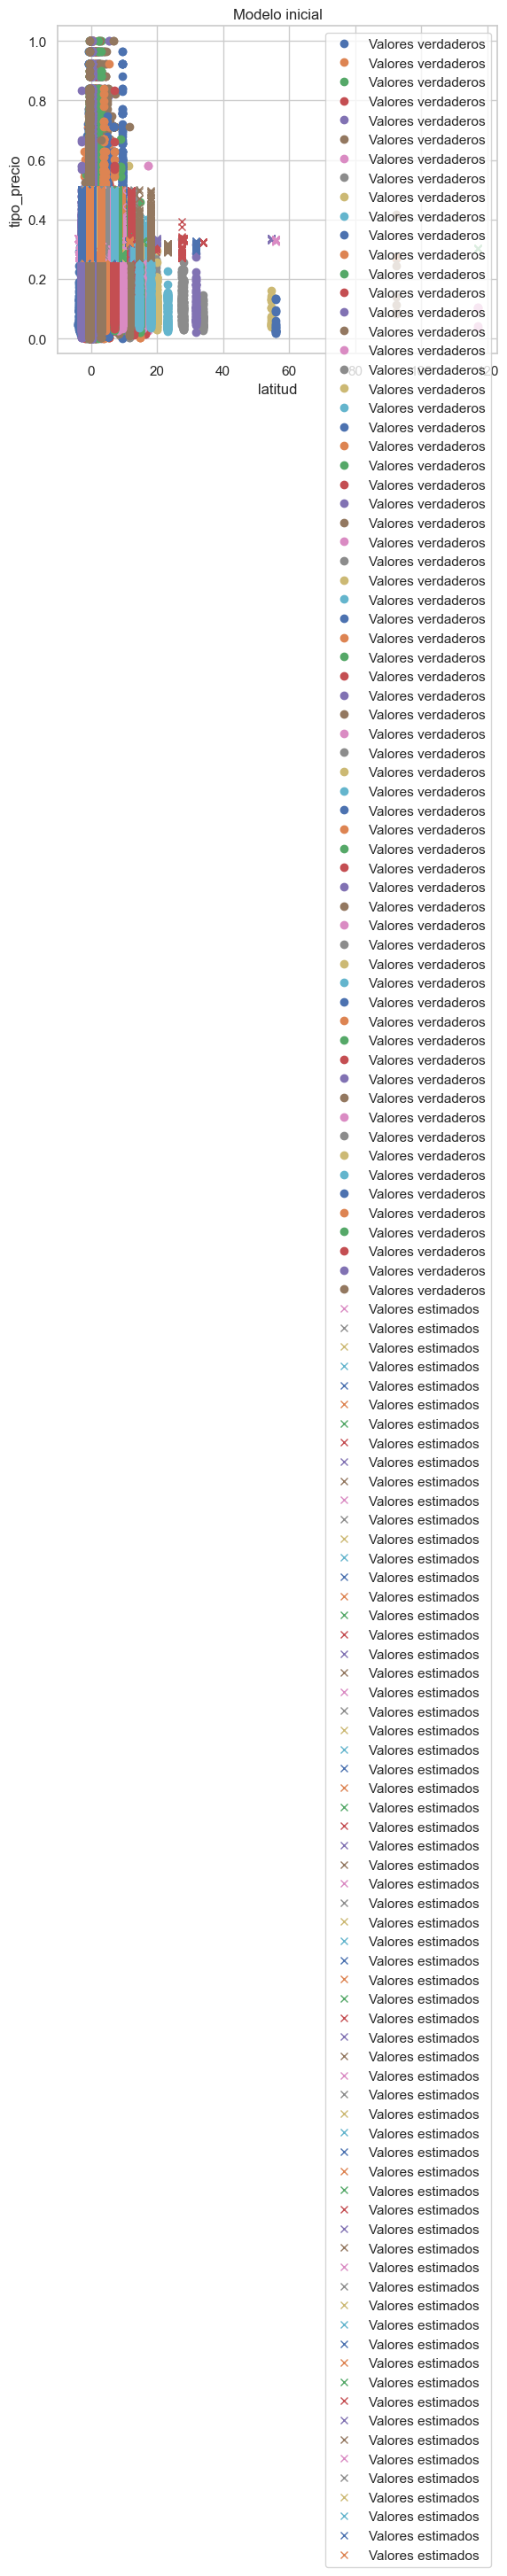

In [171]:
plot_regression(modelo1,x_train_transform,y_train,title=f"Modelo inicial",xlabel=variable_predictora,ylabel="tipo_precio")

In [172]:
modelo1.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  metrics=['mae'], 
)

In [173]:
y_pred = modelo1.fit(x_train_transform,y_train,epochs=50,batch_size=85,verbose=True)

Epoch 1/50
807/807 [==============================] - 1s 627us/step - loss: 0.0571 - mae: 0.2170
Epoch 2/50
807/807 [==============================] - 1s 620us/step - loss: 0.0424 - mae: 0.1837
Epoch 3/50
807/807 [==============================] - 1s 633us/step - loss: 0.0328 - mae: 0.1591
Epoch 4/50
807/807 [==============================] - 1s 630us/step - loss: 0.0264 - mae: 0.1408
Epoch 5/50
807/807 [==============================] - 1s 627us/step - loss: 0.0220 - mae: 0.1270
Epoch 6/50
807/807 [==============================] - 1s 627us/step - loss: 0.0190 - mae: 0.1165
Epoch 7/50
807/807 [==============================] - 1s 627us/step - loss: 0.0168 - mae: 0.1082
Epoch 8/50
807/807 [==============================] - 1s 628us/step - loss: 0.0152 - mae: 0.1018
Epoch 9/50
807/807 [==============================] - 1s 619us/step - loss: 0.0141 - mae: 0.0965
Epoch 10/50
807/807 [==============================] - 1s 629us/step - loss: 0.0132 - mae: 0.0923
Epoch 11/50
807/807 [========

In [174]:
y_pred=modelo1.predict(x_test_transform)
y_pred = y_pred.flatten()
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})


performance.head()

536/536 [==============================] - 0s 484us/step


,Valor Real,Prediccion,Error
84427,0.172996,0.175498,-0.002503
188,0.092827,0.101545,-0.008718
58792,0.155274,0.130031,0.025243
30998,0.172996,0.222841,-0.049846
68609,0.023629,0.143490,-0.119861


In [175]:
from sklearn import metrics

mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
         )

print(f"El error (mse) de test es: {mse}")



rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
         )

print(f"El error (rmse) de test es: {rmse}")    

El error (mse) de test es: 0.008665203192164335
El error (rmse) de test es: 0.0930870731743368


2143/2143 [==============================] - 1s 477us/step


C:\Users\Valentin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


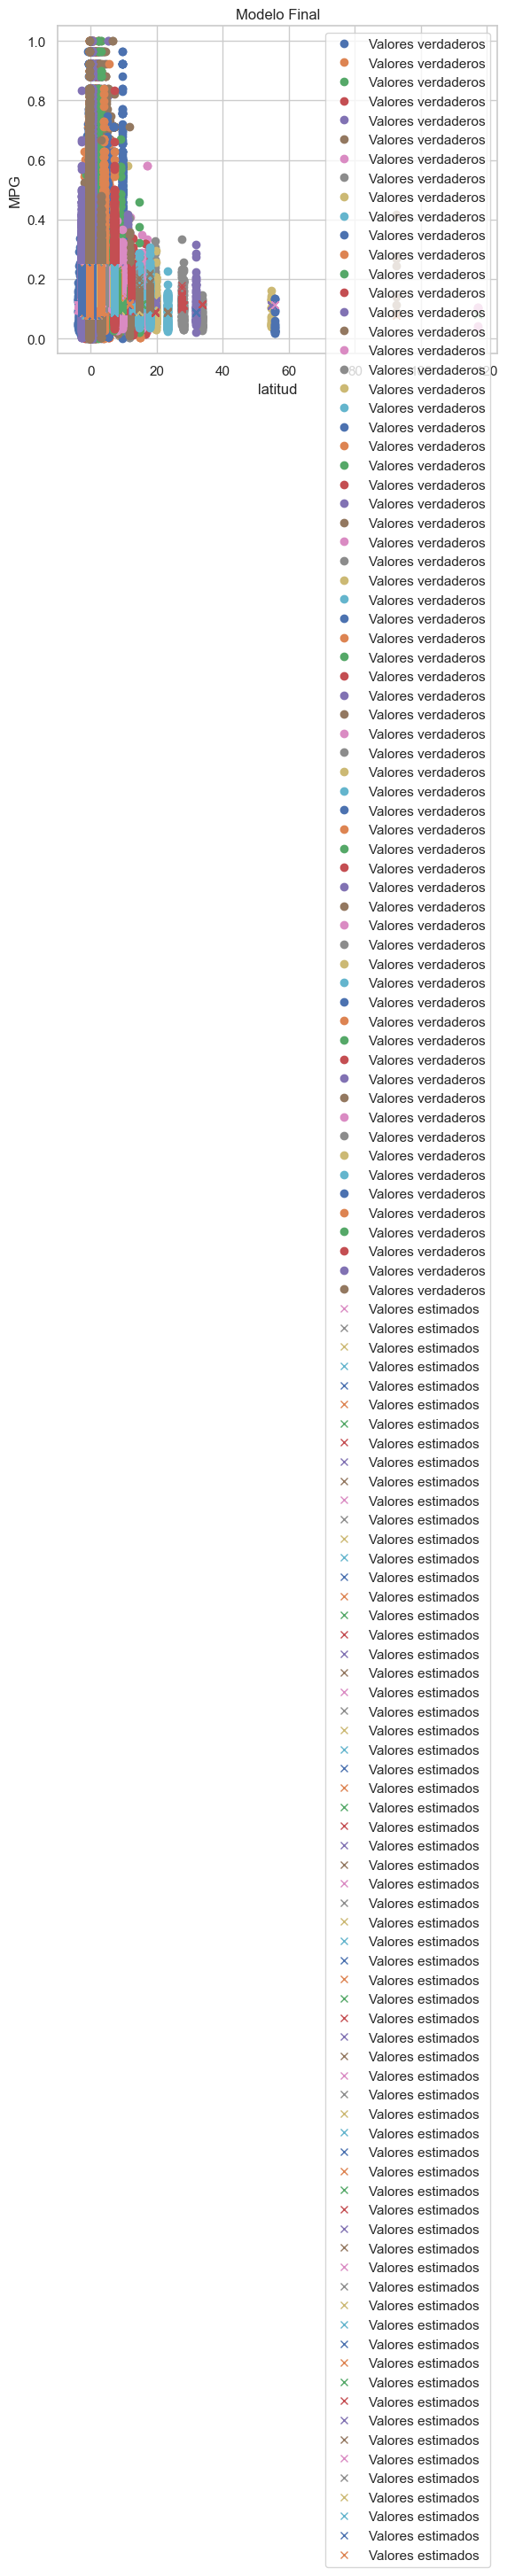

In [176]:
plot_regression(modelo1,x_train_transform,y_train,title=f"Modelo Final",xlabel=variable_predictora,ylabel="MPG")

536/536 [==============================] - 0s 499us/step


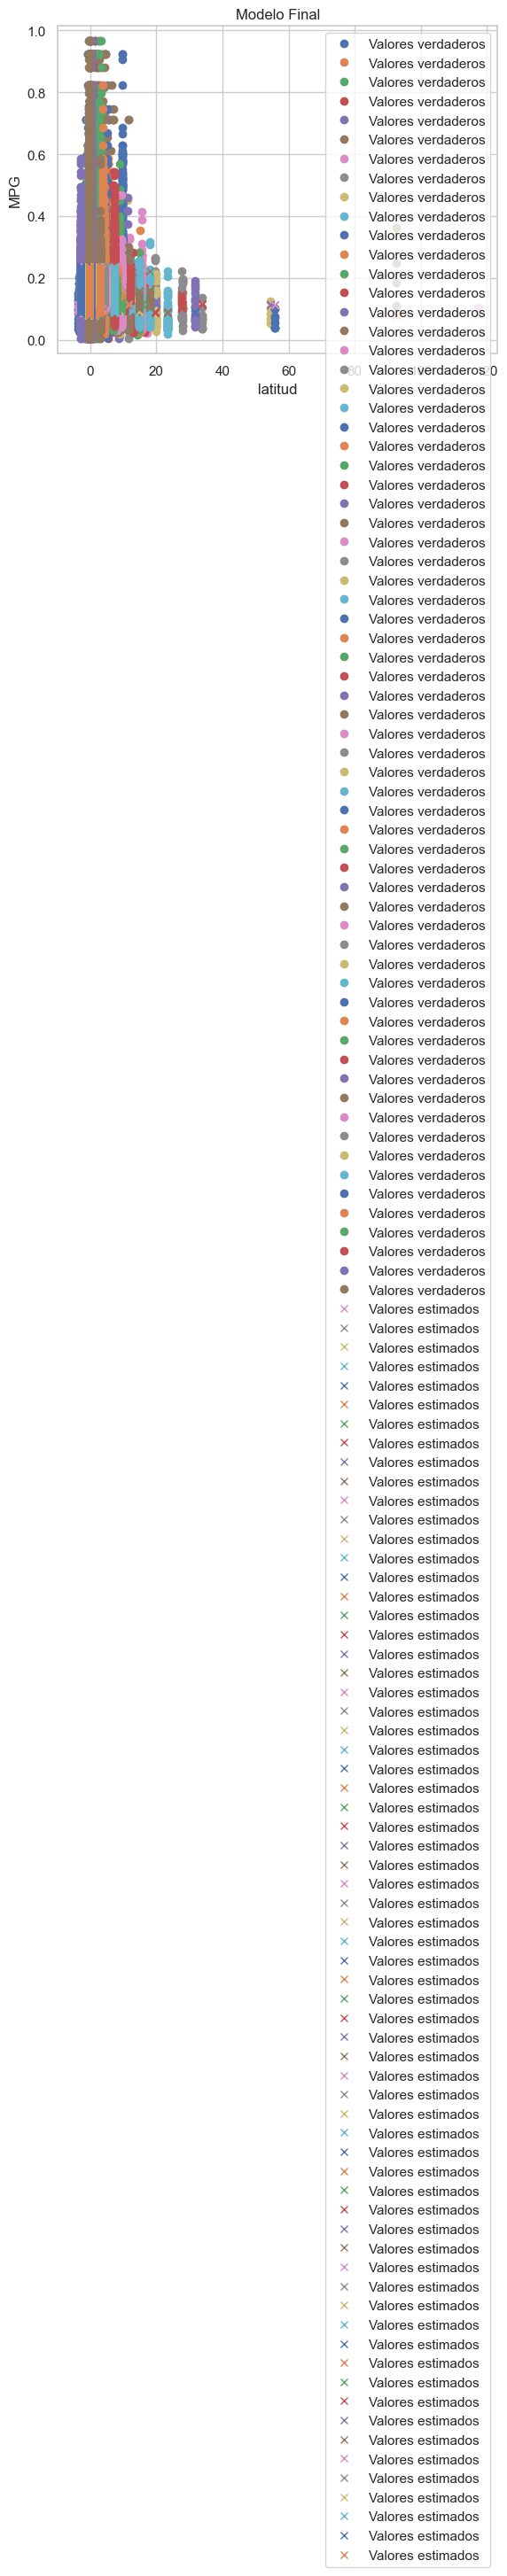

In [177]:
plot_regression(modelo1,x_test_transform,y_test,title=f"Modelo Final",xlabel=variable_predictora,ylabel="MPG")